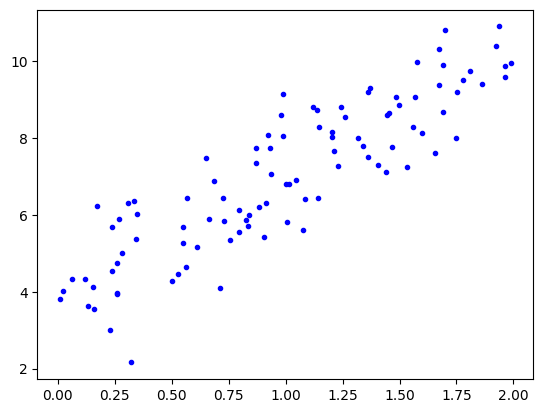

In [13]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.plot(X,y,'b.')


In [14]:
X_b = np.c_[np.ones((100, 1)), X] 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.84840297],
       [3.17748265]])

In [15]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.84840297],
       [10.20336826]])

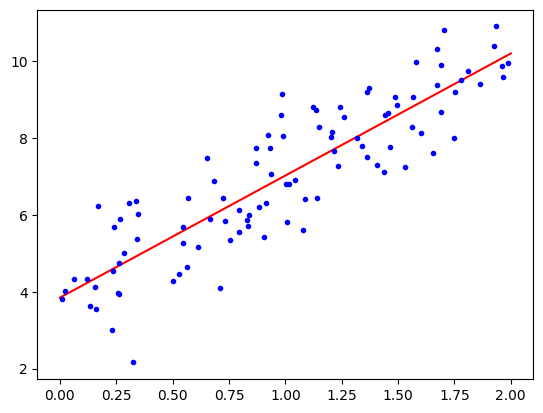

In [16]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")

In [17]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[3.84840297] [[3.17748265]]
[[ 3.84840297]
 [10.20336826]]


In [18]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.84840297],
       [3.17748265]])

In [19]:
np.linalg.pinv(X_b).dot(y)

array([[3.84840297],
       [3.17748265]])

In [1]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB 330.3 kB/s eta 0:00:09
     ---------------------------------------- 0.0/3.0 MB 330.3 kB/s eta 0:00:09
     ---------------------------------------- 0.0/3.0 MB 330.3 kB/s eta 0:00:09
      --------------------------------------- 0.1/3.0 MB 218.8 kB/s eta 0:00:14
     - -------------------------------------- 0.1/3.0 MB 270.5 kB/s eta 0:00:11
     - -------------------------------------- 0.1/3.0 MB 345.9 kB/s eta 0:00:09
     - -------------------------------------- 0.1/3.0 MB 345.9 kB/s eta 0:00:09
     - -------------------------------------- 0.1/3.0 MB 345.9 kB/s eta 0:00:09
     -- ------------------------------------- 0.2/3.0 MB 350.1 kB/s e

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


[*********************100%%**********************]  1 of 1 completed


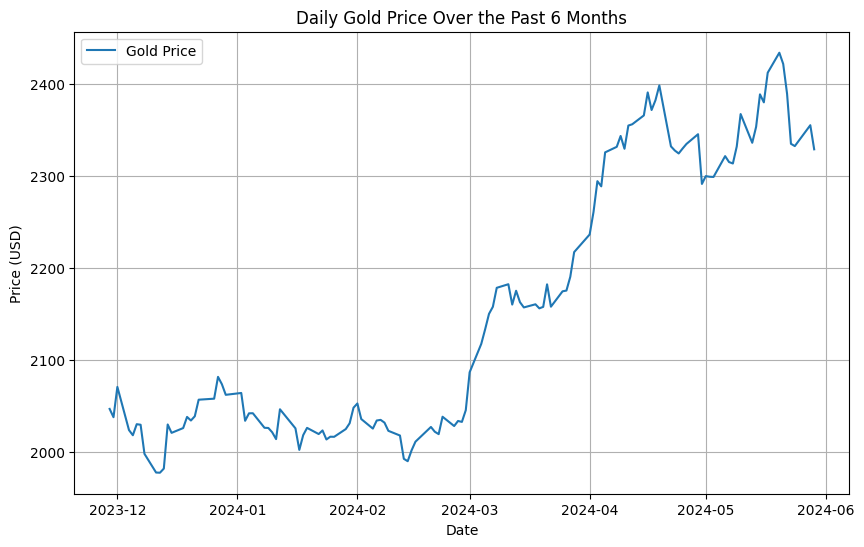

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


gold_data = yf.download('GC=F', period='6mo', interval='1d')

plt.figure(figsize=(10, 6))
plt.plot(gold_data.index, gold_data['Close'], label='Gold Price')
plt.title('Daily Gold Price Over the Past 6 Months')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
help(yf.download)

Help on function download in module yfinance.multi:

download(tickers, start=None, end=None, actions=False, threads=True, ignore_tz=None, group_by='column', auto_adjust=False, back_adjust=False, repair=False, keepna=False, progress=True, period='max', interval='1d', prepost=False, proxy=None, rounding=False, timeout=10, session=None)
    Download yahoo tickers
    :Parameters:
        tickers : str, list
            List of tickers to download
        period : str
            Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
            Either Use period parameter or use start and end
        interval : str
            Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
            Intraday data cannot extend last 60 days
        start: str
            Download start date string (YYYY-MM-DD) or _datetime, inclusive.
            Default is 99 years ago
            E.g. for start="2020-01-01", the first data point will be on "2020-01-01"
        end: str
            Downlo